In [25]:
import sequence_processing as sp
import visualize_series as vs
import stumpy
import numpy as np

## Loading Protein Sequences from fasta

In [26]:
seqs = sp.get_sequences_from_fasta('samplefiles/test_small.fasta')
seqs

[Seq('MPREIITIQVGQCGNQIGMEFWKQLCLEHGIGKDGLLE'),
 Seq('MPREIITLQLGQCGNQIGFEFWKQLCAEHGISPEGIVE'),
 Seq('MPREIITIQAGQCGNNVGSQFWQQLCLEHGISQDGNLE'),
 Seq('MGGEIITLQAGQCGNHVGKFLWSQLAKEHAIGTDGLSQL'),
 Seq('MSGTGALMTVHVGQCGNQLAQAFWKSMVDEHGINERGQT'),
 Seq('MPREIITLNVGQCGNQLGSEFFKKICSEHGILPDGSLST'),
 Seq('MPREIITCQVGQCGNQIGMEFWKQLCMEHGISPEGILEE'),
 Seq('MPREILTVSAGQAGNQIGSEFWSQLCAEHGISKEGVLE'),
 Seq('MPREIITLQLGQCGNQIGFEFWKQLCAEHGISPEGIVE'),
 Seq('MGREIITLQAGQCGNQIGSQFWQQLCLEHGIGPDGTLE'),
 Seq('MPREIITLQVGQCGNQIGMEFWKQLCLEHGISKDGILED'),
 Seq('MPREIITLQVGQCGNQIGMEFWKQLCLEHGISKEGMLED'),
 Seq('MPREIITCQVGQCGNQIGMEFWKQLCMEHGINPEGILEEY'),
 Seq('MPREIITCQVGQCGNQIGMEFWKQLCMEHGINPEGILEDF'),
 Seq('MPREGKSGLGIITIQAGQCGNSIGSQFWQQLCLEHGISQDGT'),
 Seq('MPSEIITLQLGQCGNQIGFEFWKRLCLEHGISPDGVLEDF'),
 Seq('GKSGLGMPREIITLQVGQCGNQIGMEFWKQLCLEHGISKDGILEDFA'),
 Seq('MPGKSGLGSEIITLQLGQCGNQIGFEFWKRLCLEHGISPSGVLED')]

## Transform protein sequences into numerical sequences

In [27]:
nseqs = sp.proteins_to_series(seqs)
nseqs = nseqs[12:19]


## Visualize proteins as time series

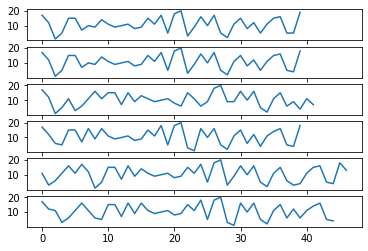

In [28]:
vs.visualize_sequences(nseqs)

## Find the consensus motif

In [29]:
m = 8
Ts = nseqs
radius, Ts_idx, subseq_idx = stumpy.ostinato(Ts, m)
print(f'Found Best Radius {np.round(radius, 2)} in time series {Ts_idx} starting at subsequence index location {subseq_idx}.')

Found Best Radius 0.39 in time series 2 starting at subsequence index location 30.


## Visualize motifs

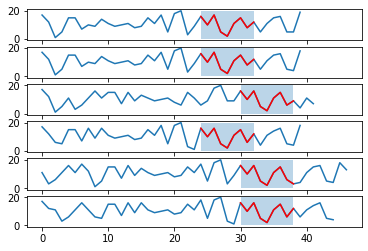

In [30]:
vs.visualize_consensus_motifs_in_sequence(nseqs, m, Ts_idx, subseq_idx)

## Visualize motifs

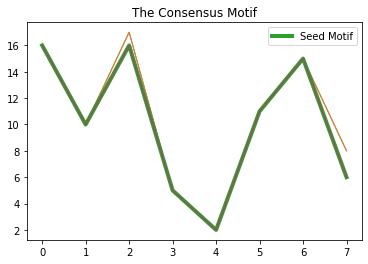

In [31]:
vs.visualize_consensus_motifs(nseqs, m, Ts_idx, subseq_idx)

In [32]:
print(vs.consensus_motif(nseqs, m, Ts_idx, subseq_idx))

[['L', 'C', 'L', 'E', 'H', 'G', 'I', 'S']]


## Find multiple motifs

In [33]:
m = 8
n = 2
motifs, pos_in_seq = sp.get_n_motifs(nseqs, m , n)

[17. 12.  1.  5. 15. 15.  7. 10.  9. 14. 11.  9. 10. 11.  8.  9. 15. 11.
 17.  5. 18. 20.  3.  9. nan nan nan nan nan nan nan nan 12.  5. 11. 15.
 16.  5.  5. 19.]
[17. 12.  1.  5. 15. 15.  7. 10.  9. 14. 11.  9. 10. 11.  8.  9. 15. 11.
 17.  5. 18. 20.  3.  9. nan nan nan nan nan nan nan nan 12.  5. 11. 15.
 16.  5.  4. 18.]
[17. 12.  1.  5. 11.  3.  6. 11. 16. 11. 15. 15.  7. 15.  9. 13. 11.  9.
 10. 11.  8.  6. 15. 11.  6.  9. 18. 20.  9.  9. nan nan nan nan nan nan
 nan nan  9.  4. 11.  7.]
[nan nan nan nan nan nan nan nan  9. 16. 11.  9. 10. 11.  8.  9. 15. 11.
 18.  5. 18. 20.  3.  1. 16. 10. 16.  5.  2. 11. 15.  6. 12.  4. 11. 14.
 16.  5.  4. 18.]
[nan nan nan nan nan nan nan nan  1.  5. 15. 15.  7. 16.  9. 14. 11.  9.
 10. 11.  8.  9. 15. 11. 17.  5. 18. 20.  3.  9. 16. 10. 16.  5.  2. 11.
 15.  6.  3.  4. 11. 15. 16.  5.  4. 18. 13.]
[nan nan nan nan nan nan nan nan  6.  5. 15. 15.  7. 16.  9. 16. 11.  9.
 10. 11.  8.  9. 15. 11. 18.  5. 18. 20.  3.  1. 16. 10. 16.  5.  2. 11

In [34]:
print(motifs)

[array([16., 10., 16.,  5.,  2., 11., 15.,  6.]), array([ 9., 10., 11.,  8.,  9., 15., 11., 17.])]


In [35]:
print(sp.series_to_proteins(motifs))

[['L', 'C', 'L', 'E', 'H', 'G', 'I', 'S'], ['Q', 'C', 'G', 'N', 'Q', 'I', 'G', 'M']]


In [36]:
pos_in_seq

[[24, 24, 30, 0, 0, 0], [11, 11, 0, 0, 0, 0]]

In [37]:
seqs = sp.get_sequences_from_fasta('samplefiles/test_small.fasta')
nseqs = sp.proteins_to_series(seqs)
nseqs = nseqs[12:18]
    
m = 4
n = 3
motifs, pos_in_seq = sp.get_n_motifs(nseqs, m , n)

print(motifs)
print(sp.series_to_proteins(motifs))

print(pos_in_seq)

[17.0, 12.0, 1.0, 5.0, 15.0, 15.0, 7.0, 10.0, 9.0, 14.0, 11.0, 9.0, 10.0, 11.0, 8.0, 9.0, 15.0, 11.0, 17.0, 5.0, 18.0, 20.0, 3.0, 9.0, 16.0, 10.0, 17.0, nan, nan, nan, nan, 8.0, 12.0, 5.0, 11.0, 15.0, 16.0, 5.0, 5.0, 19.0]
[17.0, 12.0, 1.0, 5.0, 15.0, 15.0, 7.0, 10.0, 9.0, 14.0, 11.0, 9.0, 10.0, 11.0, 8.0, 9.0, 15.0, 11.0, 17.0, 5.0, 18.0, 20.0, 3.0, 9.0, 16.0, 10.0, 17.0, nan, nan, nan, nan, 8.0, 12.0, 5.0, 11.0, 15.0, 16.0, 5.0, 4.0, 18.0]
[17.0, 12.0, 1.0, 5.0, 11.0, 3.0, 6.0, 11.0, 16.0, 11.0, 15.0, 15.0, 7.0, 15.0, 9.0, 13.0, 11.0, 9.0, 10.0, 11.0, 8.0, 6.0, 15.0, 11.0, 6.0, 9.0, 18.0, 20.0, 9.0, 9.0, 16.0, 10.0, 16.0, nan, nan, nan, nan, 6.0, 9.0, 4.0, 11.0, 7.0]
[17.0, 12.0, 6.0, 5.0, 15.0, 15.0, 7.0, 16.0, 9.0, 16.0, 11.0, 9.0, 10.0, 11.0, 8.0, 9.0, 15.0, 11.0, 18.0, 5.0, 18.0, 20.0, 3.0, 1.0, 16.0, 10.0, 16.0, nan, nan, nan, nan, 6.0, 12.0, 4.0, 11.0, 14.0, 16.0, 5.0, 4.0, 18.0]
[11.0, 3.0, 6.0, 11.0, 16.0, 11.0, 17.0, 12.0, 1.0, 5.0, 15.0, 15.0, 7.0, 16.0, 9.0, 14.0, 11.0, 9.